importing numpy and pandas libraries

In [82]:
import pandas as pd
import numpy as np

reading the dataset

In [83]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [84]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
df.size

900

Finding unique values in each column

In [86]:
unique_counts = df.nunique()
unique_counts

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

Removing unwanted columns

In [87]:
df = df = df.drop('Id', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Checking Null values

In [88]:
df.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [89]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Changing three different species intoo numbers

In [90]:
d = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}
df['Species'] = df['Species'].map(d)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Extracting x and y

In [91]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

importing matplotlib library

In [92]:
import matplotlib.pyplot as plt

In [93]:
a = df['SepalLengthCm']
b = df['SepalWidthCm']

visualizing using scatter plot

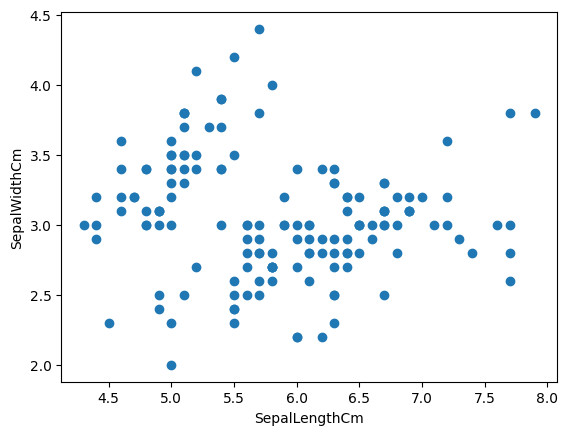

In [94]:
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.scatter(a,b)

In [95]:
c = df['PetalLengthCm']
d = df['PetalWidthCm']

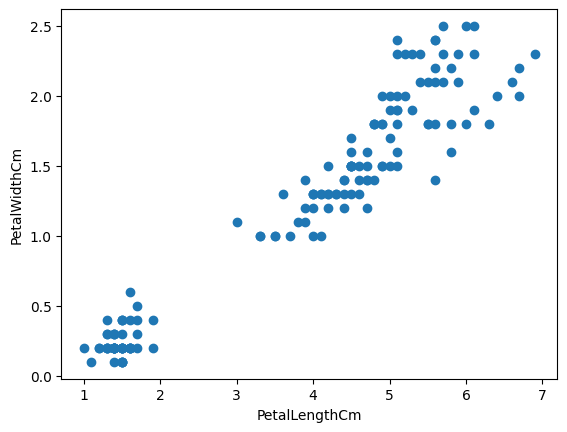

In [96]:
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(c,d)

visualizing using pie chart

([<matplotlib.patches.Wedge at 0x7f9f3f64dbd0>,
 [Text(0.5499999702695115, 0.9526279613277875, '0'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '1'),
  Text(0.5500001486524352, -0.9526278583383436, '2')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

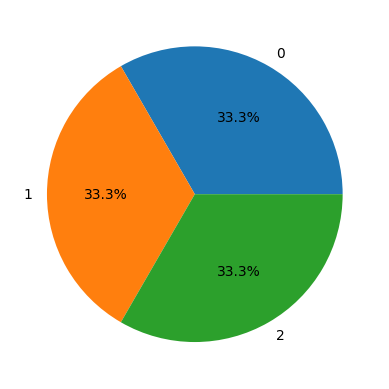

In [97]:
p = df['Species'].value_counts()
plt.pie(p, labels=p.index, autopct='%1.1f%%')

importing and splitting training and testing data

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Feature scaling using z-score scaling

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [100]:
scaled_x = scaler.fit_transform(x)

importing k-means from sklearn

In [101]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

Training model using k-means

In [102]:
kmeans.fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

Predicting the values

In [103]:
y_predict = kmeans.predict(x_test)
y_predict

array([2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 0], dtype=int32)

Labels of the given data, it indicates that which record belongs to which cluster

In [104]:
kmean_labels = kmeans.labels_
kmean_labels

array([1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0,
       1, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1,
       0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2,
       0, 2, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 0, 2,
       2, 2, 2, 0, 0, 0, 1, 2, 1, 0], dtype=int32)

Evaluate the performance of k-means

In [105]:
from sklearn.metrics import adjusted_rand_score
kmeans_score = adjusted_rand_score(y_test, y_predict)
kmeans_score

0.7657144139494176

Finding the centers of clusters

In [106]:
centers = kmeans.cluster_centers_

visualizing the clusters

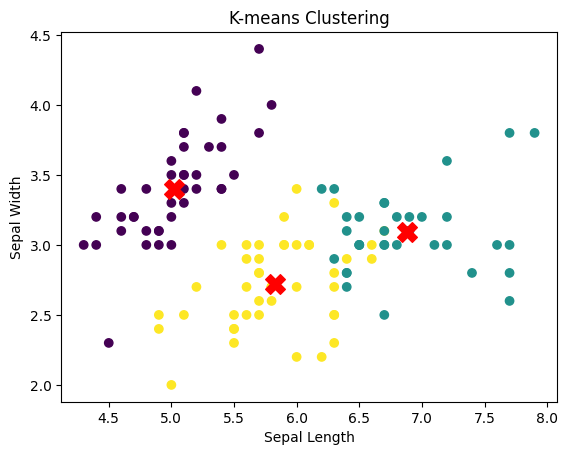

In [118]:
plt.scatter(x_train['SepalLengthCm'], x_train['SepalWidthCm'], c=kmean_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', color='red', s=200)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering')
plt.show()


importing AgglomerativeClustering form sklearn

In [108]:
from sklearn.cluster import AgglomerativeClustering

Training the model

In [109]:
clustering = AgglomerativeClustering(n_clusters=3)
hc_labels = clustering.fit_predict(x_train)

Evaluate the performance of AgglomerativeClustering

In [110]:
hc_score = adjusted_rand_score(y_train, hc_labels)
hc_score

0.6805261646644626

In [111]:
# plt.scatter(x_train['SepalLengthCm'], x_train['SepalWidthCm'], c=hc_labels)
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Hierarchical Clustering')
# plt.show()

importing and implementing PCA(Principal Component Analysis)

In [112]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y
df_pca.head()

,PC1,PC2,target
0,-2.684207,0.326607,0
1,-2.715391,-0.169557,0
2,-2.889820,-0.137346,0
3,-2.746437,-0.311124,0
4,-2.728593,0.333925,0


PCA plot

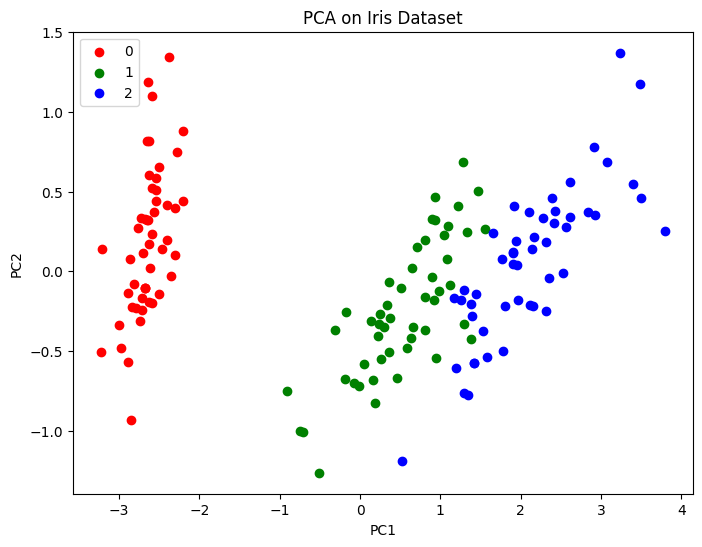

In [113]:
plt.figure(figsize=(8, 6))
targets = np.unique(y)
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices = df_pca['target'] == target
    plt.scatter(df_pca.loc[indices, 'PC1'], df_pca.loc[indices, 'PC2'], c=color, label=target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA on Iris Dataset')
plt.legend()
plt.show()

Training tha model using LogisticRegression

In [114]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

Finding Accuracy of LogisticRegression

In [115]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

Training tha model using KNeighborsClassifier and finding the accuracy

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_y_predict = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_y_predict)
knn_accuracy

0.9666666666666667